# 3 Train Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


### Clean and Filter Data

In [4]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df['season'] = df['date'].dt.quarter

df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015,1
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015,1
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015,1
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019,4
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019,4
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019,4
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019,4


In [5]:
# filter for line 3
df_3 = df[df['line'] == '3']
df_3

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
26,2,3,A DIVISION,1,3300,5618,0.587398,2015-02-01,2015,1
50,3,3,A DIVISION,1,4015,6304,0.636897,2015-03-01,2015,1
74,4,3,A DIVISION,1,4494,6704,0.670346,2015-04-01,2015,2
98,5,3,A DIVISION,1,4087,6092,0.670880,2015-05-01,2015,2
...,...,...,...,...,...,...,...,...,...,...
1529,10,3,A DIVISION,2,1355,1668,0.812350,2019-10-01,2019,4
1575,11,3,A DIVISION,1,5243,5874,0.892577,2019-11-01,2019,4
1576,11,3,A DIVISION,2,1101,1460,0.754110,2019-11-01,2019,4
1622,12,3,A DIVISION,1,5435,6304,0.862151,2019-12-01,2019,4


### Data analysis

In [6]:
# calculate average yearly on-time performance for line 3
df_3_avg_year = df_3.groupby(['year'])['terminal_on_time_performance'].mean()
df_3_avg_year

year
2015    0.651628
2016    0.576781
2017    0.496205
2018    0.684810
2019    0.791750
Name: terminal_on_time_performance, dtype: float64

In [7]:
# calculate average monthly on-time performance for line 3
df_3_avg = df_3.groupby(['year', 'month'])['terminal_on_time_performance'].mean().reset_index()
df_3_avg.head()

,year,month,terminal_on_time_performance
0,2015,1,0.686322
1,2015,2,0.587398
2,2015,3,0.636897
3,2015,4,0.670346
4,2015,5,0.670880


In [8]:
df_3_avg['yearly_avg'] = df_3_avg.groupby(['year'])['terminal_on_time_performance'].transform('mean')
df_3_avg.head()

,year,month,terminal_on_time_performance,yearly_avg
0,2015,1,0.686322,0.651628
1,2015,2,0.587398,0.651628
2,2015,3,0.636897,0.651628
3,2015,4,0.670346,0.651628
4,2015,5,0.670880,0.651628


In [9]:
# get months with below average on-time performance
c1 = df_3_avg['terminal_on_time_performance'] < df_3_avg['yearly_avg']
df_3_avg[c1].head()


,year,month,terminal_on_time_performance,yearly_avg
1,2015,2,0.587398,0.651628
2,2015,3,0.636897,0.651628
7,2015,8,0.641747,0.651628
9,2015,10,0.616199,0.651628
11,2015,12,0.643656,0.651628


In [10]:
# get months with above average on-time performance
c2 = df_3_avg['terminal_on_time_performance'] > df_3_avg['yearly_avg']
df_3_avg[c2].head()


,year,month,terminal_on_time_performance,yearly_avg
0,2015,1,0.686322,0.651628
3,2015,4,0.670346,0.651628
4,2015,5,0.670880,0.651628
5,2015,6,0.686693,0.651628
6,2015,7,0.656612,0.651628


In [11]:
# examine day type and on-time performance
df_3_day_type = df_3.groupby(['day_type'])['terminal_on_time_performance'].mean().reset_index()
df_3_day_type

,day_type,terminal_on_time_performance
0,1,0.651323
1,2,0.717831


### Data Visualization

In [12]:
df_3['day_type_fmt'] = np.where(df_3['day_type'] == 1, 'Weekday', 'Weekend')
df_3

C:\Users\olowu\AppData\Local\Temp\ipykernel_19484\3727733975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['day_type_fmt'] = np.where(df_3['day_type'] == 1, 'Weekday', 'Weekend')


,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season,day_type_fmt
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1,Weekday
26,2,3,A DIVISION,1,3300,5618,0.587398,2015-02-01,2015,1,Weekday
50,3,3,A DIVISION,1,4015,6304,0.636897,2015-03-01,2015,1,Weekday
74,4,3,A DIVISION,1,4494,6704,0.670346,2015-04-01,2015,2,Weekday
98,5,3,A DIVISION,1,4087,6092,0.670880,2015-05-01,2015,2,Weekday
...,...,...,...,...,...,...,...,...,...,...,...
1529,10,3,A DIVISION,2,1355,1668,0.812350,2019-10-01,2019,4,Weekend
1575,11,3,A DIVISION,1,5243,5874,0.892577,2019-11-01,2019,4,Weekday
1576,11,3,A DIVISION,2,1101,1460,0.754110,2019-11-01,2019,4,Weekend
1622,12,3,A DIVISION,1,5435,6304,0.862151,2019-12-01,2019,4,Weekday


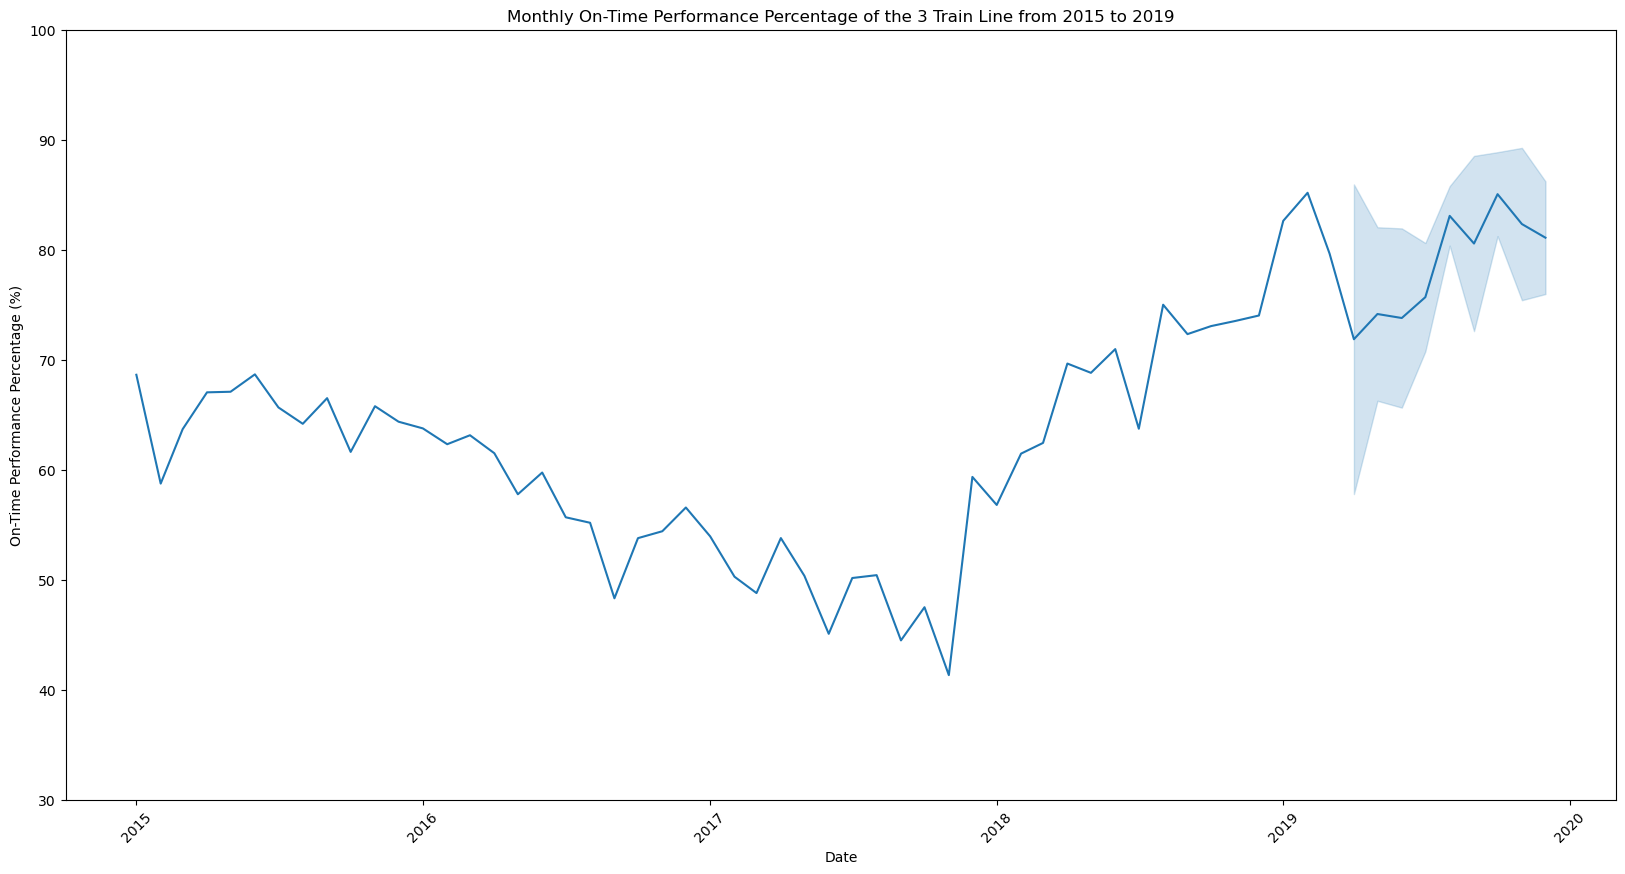

In [13]:
# Create a line chart showing the monthly on-time performance percentage of the 3 train line from 2015 to 2019.
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y=df_3['terminal_on_time_performance']*100, data=df_3)

plt.title('Monthly On-Time Performance Percentage of the 3 Train Line from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('On-Time Performance Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(30, 100)
plt.show()

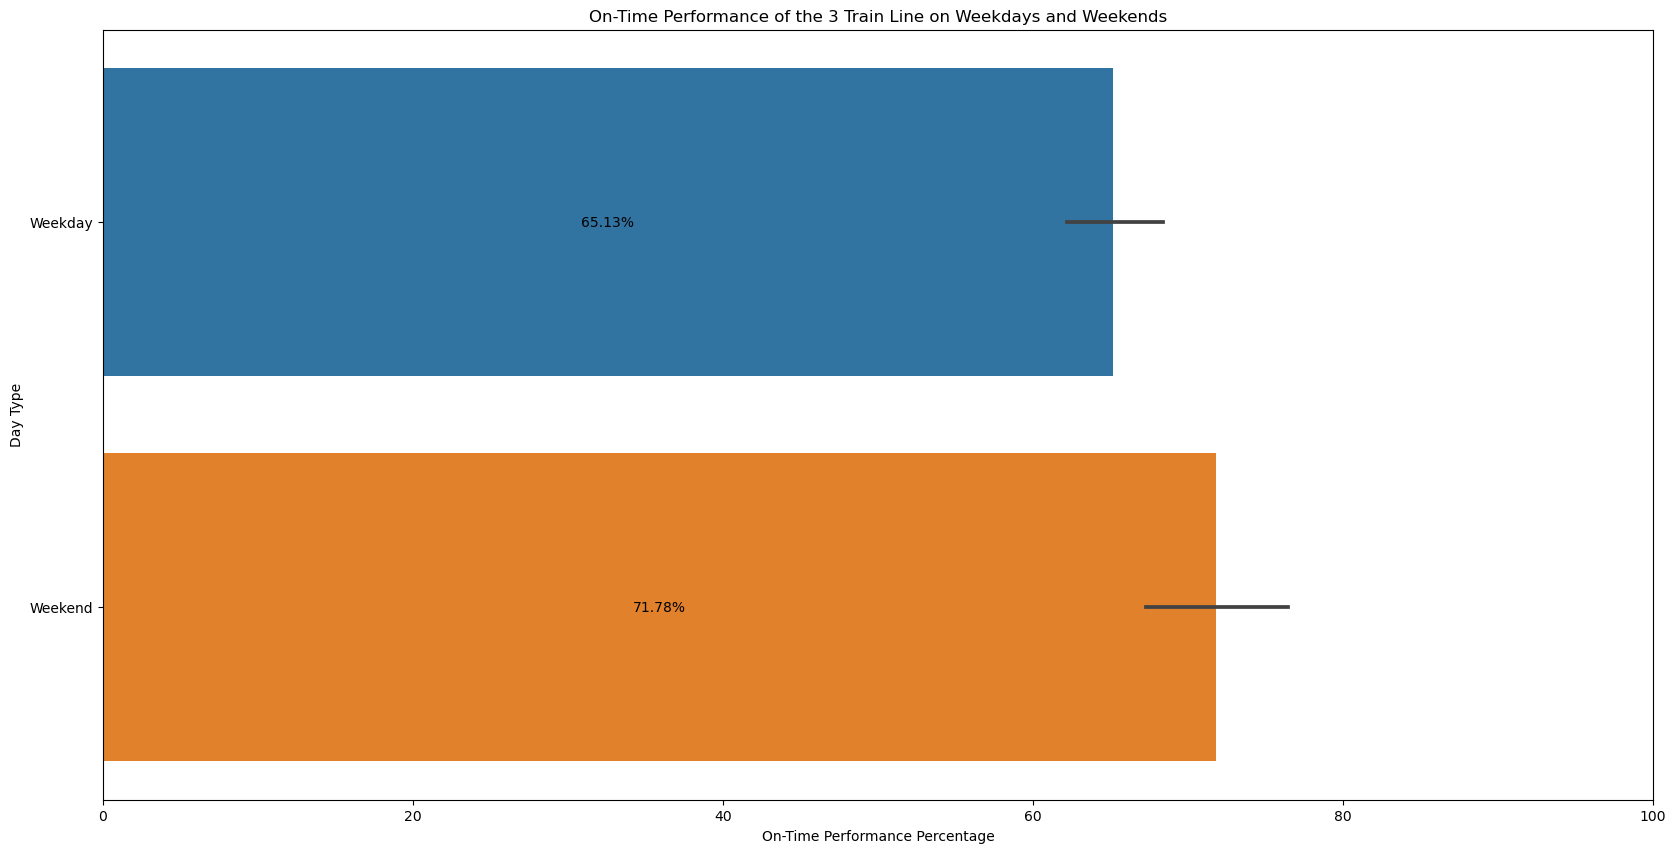

In [14]:
# Generate a bar chart comparing the on-time performance of the 3 train line on weekdays and weekends.
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df_3['terminal_on_time_performance']*100, y='day_type_fmt', data=df_3, orient='h')

for con in ax.containers:
    ax.bar_label(con, fmt='%.2f%%', label_type='center')

plt.title('On-Time Performance of the 3 Train Line on Weekdays and Weekends')
plt.xlabel('On-Time Performance Percentage')
plt.ylabel('Day Type')
plt.xlim(0, 100)
plt.show()

In [15]:
# Use a heatmap to show the distribution of on-time performance across different months and years for the 3 train line.
df_3_pivot = df_3.pivot_table(index='year', columns='month', values='terminal_on_time_performance')
df_3_pivot


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,0.686322,0.587398,0.636897,0.670346,0.670880,0.686693,0.656612,0.641747,0.665052,0.616199,0.657734,0.643656
2016,0.637557,0.623186,0.631338,0.615002,0.577681,0.597445,0.556759,0.551769,0.483114,0.537796,0.544076,0.565646
2017,0.539387,0.502711,0.487856,0.537853,0.503534,0.450826,0.501556,0.504158,0.444846,0.475004,0.413270,0.593457
2018,0.567967,0.614631,0.624368,0.696517,0.688079,0.709645,0.637257,0.750000,0.723267,0.730561,0.735234,0.740196
2019,0.826263,0.851765,0.796474,0.718612,0.741552,0.737914,0.756871,0.830771,0.805621,0.850511,0.823344,0.810932


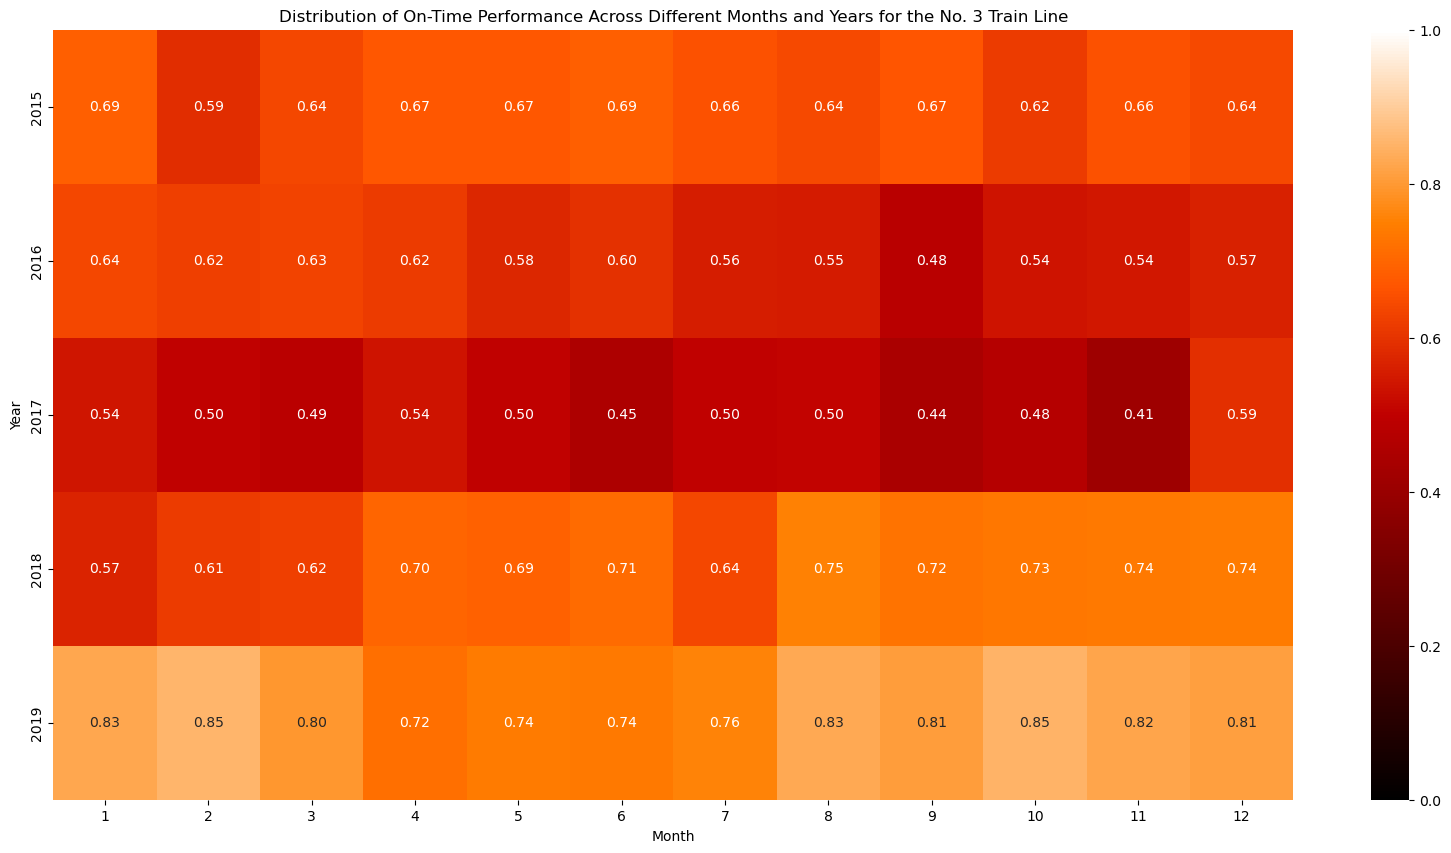

In [16]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df_3_pivot, annot=True, fmt='.2f', cmap='gist_heat', vmax=1, vmin=0)

plt.title('Distribution of On-Time Performance Across Different Months and Years for the No. 3 Train Line')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()